In [2]:
# 랜덤포레스트(회귀)
# 데이터가 상관성이 있을 때 입력변수가 많은 경우 배깅, 부스팅과 비슷하거나 좋은 예측력을 보임.

In [5]:
import pandas as pd 
df = pd.read_csv('data/kc_house_data.csv')
df = df.drop(['id','date'], axis=1)

X = df.drop('price',axis=1)
y = df['price']

X = pd.get_dummies(data = X, columns=['waterfront'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2021)

In [9]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(n_estimators=50)

reg = reg.fit(X_train, y_train)

Y_pred = reg.predict(X_test)
print("train 정확도 : ", reg.score(X_train, y_train))

print("test 정확도 : ", reg.score(X_test, y_test))

# 배깅까지 했을 때는 다른 모델을 해봐야겠다? 그런데 랜덤포레스트 등 여러 모델을 해봤는데도, 성능이 비슷하다면
# input 데이터로는 한계가 있거나, 전처리 다시 필요

train 정확도 :  0.9623971311744515
test 정확도 :  0.7533639492388798


In [7]:
## 변수의 중요도 확인

import numpy as np 
importances = pd.DataFrame(np.mean([tree.feature_importances_ for tree in reg.estimators_], axis=0))
feature_importances = pd.concat([pd.DataFrame(X.columns), importances], axis=1)
feature_importances.columns=["col_name","feature_importance"]
feature_importances = feature_importances.sort_values(by="feature_importance",ascending=False).reset_index(drop=True)
feature_importances

,col_name,feature_importance
0,grade,0.359357
1,sqft_living,0.265406
2,yr_built,0.099739
3,sqft_living15,0.062854
4,sqft_lot15,0.047009
5,sqft_lot,0.034946
6,sqft_above,0.027770
7,bathrooms,0.022299
8,view,0.022257
9,sqft_basement,0.012454


In [8]:
reg = RandomForestRegressor(n_estimators=100, 
                             min_samples_split=5, 
                             oob_score=True)
reg = reg.fit(X, y)

print(f"oob score : {reg.oob_score_}")
# oob도 비슷, 모델링으로는 성능향상 한계.

oob score : 0.7516607860221092


In [12]:
# 랜덤포레스트(분류)

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split

credit = pd.read_csv("data/credit_final.csv")
X = credit[credit.columns.difference(['credit.rating'])]
y = credit['credit.rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=321)
X_train.head()

,account.balance,age,apartment.type,bank.credits,credit.amount,credit.duration.months,credit.purpose,current.assets,dependents,employment.duration,foreign.worker,guarantor,installment.rate,marital.status,occupation,other.credits,previous.credit.payment.status,residence.duration,savings,telephone
133,3,26,2,1,1453,18,3,1,1,1,1,1,3,1,3,2,2,1,1,1
464,2,24,1,1,7472,12,4,1,1,1,1,1,1,1,1,2,2,2,4,1
919,1,46,3,2,6331,48,1,4,1,4,1,1,4,3,3,2,3,4,1,2
865,3,39,3,2,1271,15,3,4,1,2,1,1,3,3,3,2,3,4,4,2
352,3,46,2,2,7629,48,4,3,2,4,1,1,4,1,4,1,3,2,4,1


In [14]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("정확도 : ", clf.score(X_test, y_test))

정확도 :  0.74


In [15]:
from sklearn.metrics import confusion_matrix # 오차행렬
# 정밀도, 재현율, F1 스코어 : f1_score(test_y, pred)로 사용
from sklearn.metrics import precision_score, recall_score, f1_score 

print(f"정밀도 : {precision_score(y_test, y_pred)}")
print(f"재현율 : {recall_score(y_test, y_pred)}")
print(f"F1 스코어 : {f1_score(y_test, y_pred)}")

# 오차행렬
pd.DataFrame(confusion_matrix(y_test, y_pred),
             index=['True[0]', 'True[1]'],
             columns=['Pred[0]','Pred[1]'])

정밀도 : 0.757201646090535
재현율 : 0.9064039408866995
F1 스코어 : 0.8251121076233184


,Pred[0],Pred[1]
True[0],38,59
True[1],19,184


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


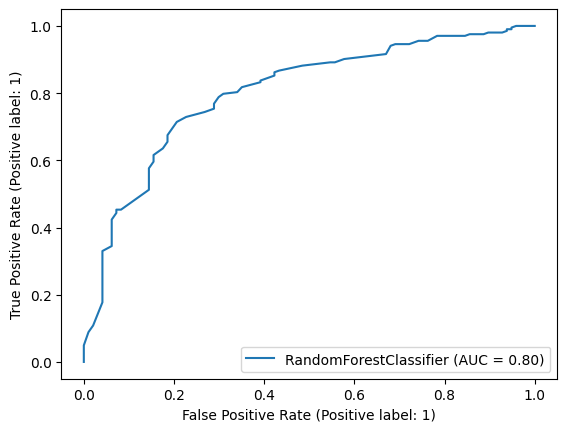

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

plot_roc_curve(clf, X_test, y_test)
plt.show()

In [17]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [18]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':range(2,10,2) , 'min_samples_leaf':range(2,10,2)}
model_grid_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
model_grid_rf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 10, 2),
                         'min_samples_leaf': range(2, 10, 2)})

In [19]:
model_grid_rf.best_estimator_.estimators_

[DecisionTreeClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=6,
                        random_state=1297452692),
 DecisionTreeClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=6,
                        random_state=405399544),
 DecisionTreeClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=6,
                        random_state=1071209788),
 DecisionTreeClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=6,
                        random_state=1660800591),
 DecisionTreeClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=6,
                        random_state=1198147025),
 DecisionTreeClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=6,
                        random_state=1778319139),
 DecisionTreeClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=6,
                        random_state=317198648),
 DecisionTreeClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=6,
                        rand

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


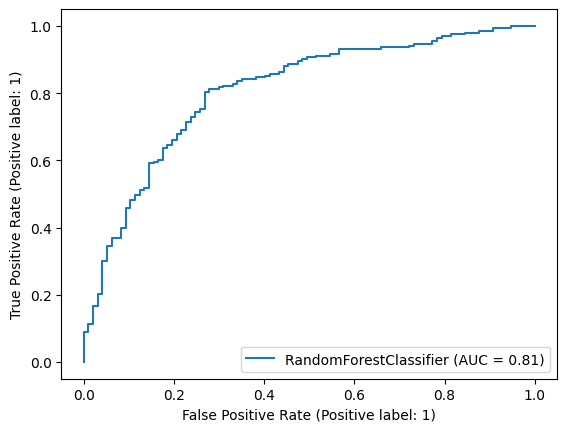

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model_grid_rf.best_estimator_, X_test, y_test)
plt.show()

In [21]:
## 변수의 중요도 확인

import numpy as np
importances = pd.DataFrame(np.mean([tree.feature_importances_ for tree in model_grid_rf.best_estimator_.estimators_], axis=0))
feature_importances = pd.concat([pd.DataFrame(X.columns), importances], axis=1)
feature_importances.columns=["col_name","feature_importance"]
feature_importances = feature_importances.sort_values(by="feature_importance",ascending=False).reset_index(drop=True)
feature_importances

,col_name,feature_importance
0,account.balance,0.206010
1,credit.duration.months,0.132756
2,credit.amount,0.126395
3,previous.credit.payment.status,0.090438
4,age,0.068022
5,savings,0.065320
6,current.assets,0.061641
7,credit.purpose,0.050806
8,employment.duration,0.044907
9,installment.rate,0.029184


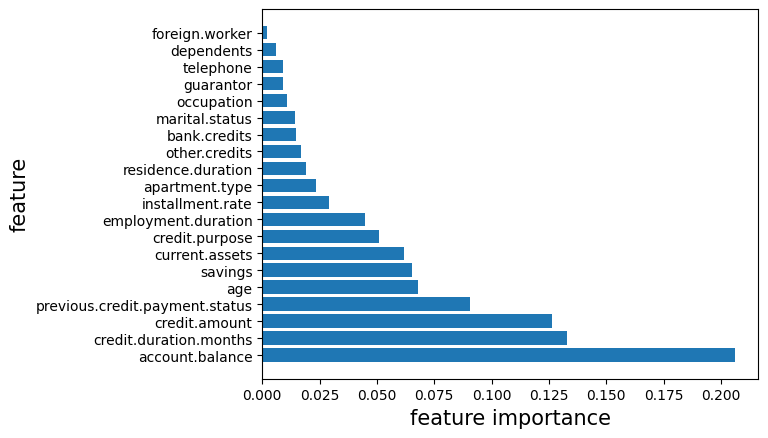

In [22]:
import matplotlib.pyplot as plt


plt.barh(feature_importances["col_name"], feature_importances["feature_importance"], align='center')

plt.xlabel('feature importance', size=15)

plt.ylabel('feature', size=15)

plt.show()

In [ ]:
# 배깅과 다르게 age가 5위 > 편향된 데이터의 분산을 최소화 시켜주면서, feature_importance의 순서가 변경될 수 있다.
# best_estimator_.feature_importance의 값을 더 정확하게 측정가능하다.
# input 변수가 더 많은 경우, 랜덤 포레스트의 분류는 더 강력해진다.